# Jupyter Data Entry Tutorial
## Inputting and presenting data using Jupyter, Pandas, and Qgrid
by Nate Tompkins

### Jupyter Basics

When working in Jupyter you can write text and write code. Text is written in a "Markdown Cell" (such as this one). You can make big headings by adding a # at the beginning of the line and smaller headings by adding ## or ###. Normal text you just type. You enter a cell to render it by typing shift-return. When writing code you use a code cell. Entering a code cell runs the code, such as the next cell.

For more information on installing Jupyter and formatting Markdown cells: https://realpython.com/jupyter-notebook-introduction/

For more on plotting and writing math: https://plot.ly/python/ipython-notebook-tutorial/

For a more detailed Jupyter introduction: https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/examples_index.html

In [1]:
# This is a code cell, text in this cell will run as Python code.
# Lines that begin with a # are comments and do nothing.
# A comment can also be adding at the end of a line of code.
2+2 # This is a very simple piece of code.

4

Code cells are also a very convenient calculator! They can do some pretty cool stuff.

In [2]:
# One advantage of code is the ability to store variables
x = 2+2 # This sets the variable "x" equal to the result of "2+2"

In [3]:
# Note that the result wasn't shown, but "x" is in memory
x # Calling the variable by itself will disply its value

4

Before we do anything further we need to address one issue that is very different from Excel: data permanence. If you save an Excel file, quit Excel, and reopen it: everything is still there. That is NOT the case with Jupyter. All output will still be there, but anything you've defined, like your data, will be gone. However, we can fix this using dill.

Before moving further in this tutorial, quit Jupyter and reopen this file.

In [1]:
# After restarting enter this cell
x # Remember we set this equal to 4

NameError: name 'x' is not defined

And we get an error: "name 'x' is not defined"

Anything stored as a variable is not saved from session to session. Note that all of the input and output is saved from session to session (as long as you remembered to save the notebook!) but variables are not. However, we can change this using a package called "dill" which will "pickle" the notebook. Python is full of "cute" names such as these.

In [2]:
# Running this cell is equivalent so saving your progress
# Before you turn off the computer, or after every significant change, run this cell
import dill # Dill is a package that lets us save everything under the hood
filename = 'Data_Entry_Tutorial_Data.pkl' # This is where the data file will be stored
file = open(filename, 'wb') # This opens the file we are going to write the data too
dill.dump(x, file) # This write the variable "x" to the "file" we specified
file.close() # This closes the file

NameError: name 'x' is not defined

In [3]:
# To test this lets save some variables
x = 2+2
y = 3+3
x,y

(4, 6)

In [4]:
# We have to save the file AFTER the variable is in memory
import dill # It never hurts to reimport a package
filename = 'Data_Entry_Tutorial_Data.pkl' # This is where the data file will be stored
file = open(filename, 'wb') # This opens the file we are going to write the data to
dill.dump(x, file) # This write the variable "x" to the "file" we specified
dill.dump(y, file) # This write the variable "y" to the "file" we specified
file.close() # This closes the file

Before moving further in this tutorial, quit Jupyter and reopen this file.

In [1]:
# To load your data, run this this cell
import dill # It never hurts to reimport a package
filename = 'Data_Entry_Tutorial_Data.pkl' # This is where the data file is stored
file = open(filename,'rb') # This opens the file we are going to read the data from
x = dill.load(file) # This loads the variable "x" from the file storing the data
y = dill.load(file) # This loads the variable "y" from the file storing the data
file.close() # This closes the file

In [2]:
# Time to check that the variables loaded as advertised
x,y

(4, 6)

Success!

This is an important step. Be sure to run a cell with the save code after you've entered anything you'd like saved.

In [ ]:
# Save code:
import dill # It never hurts to reimport a package
filename = 'Data_Entry_Tutorial_Data.pkl' # This is where the data file will be stored
file = open(filename, 'wb') # This opens the file we are going to write the data to
dill.dump(x, file) # This write the variable "x" to the "file" we specified
file.close() # This closes the file

# Load code: 
import dill # It never hurts to reimport a package
filename = 'Data_Entry_Tutorial_Data.pkl' # This is where the data file is stored
file = open(filename,'rb') # This opens the file we are going to read the data from
x = dill.load(file) # This loads the variable "x" from the file storing the data
file.close() # This closes the file

### Data Entry

The purpose of this tutorial is to enter data and plot data. Data is entered as a pandas object using a qgrid frame. It isn't import to understand the details, but if you want to do something not included here there are excellent resources online. A quick Google search can show you how to do most anything. This is the first thing I will do if you ask me. What is important is that if you are having a problem entering data you need to Google "qgrid problem" and if you are having a problem manipulating the data that is already entered then you need to Google "pandas problem" instead.

In [2]:
# This cell imports all of the data import commands, it must be run before doing anything else.
import numpy as np # This imports numerical python, essentially math commands in Python.
import pandas as pd # This imports the data type pandas.
import qgrid # This imports qgrid, the data entry frame.
import matplotlib.pyplot as plt # This imports the ability to plot.
from scipy.optimize import curve_fit # This imports curve fitting.

In [3]:
#### The next piece of code creates a simple data entry table.
startinglength = 5; # This is the initial length of the table, you can make it longer later.
data_table = pd.DataFrame({
    'time' :pd.Series(0,index=list(range(startinglength)),dtype='float32') ,
    'position' : pd.Series(0,index=list(range(startinglength)),dtype='float32')
})
qgrid_widget = qgrid.show_grid(data_table, show_toolbar=True);
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

The column on the left is the data point number. In computer science counting starts at zero. Before moving on, change some of the numbers above. Then, run the cell below.

In [4]:
qgrid_widget.get_changed_df() # Display the table with your updates included

,time,position
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


The data changes when you type a new value and hit return. Basic data entry!

Note though that the variable "data_table" we created hasn't been updated!

In [6]:
data_table # This is still the inital data table, without your updates

,time,position
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


However, the values we entered are still stored in the computer and we can save them as our data.

In [7]:
# The variable data will store all of the data we entered above.
# If we go back and change the data table the variable data will NOT automatically update.
data = qgrid_widget.get_changed_df() # This creates a new variable called data with your updates
data # Putting a variable on its own line displays that variable

,time,position
0,0.0,0.0
1,1.0,2.0
2,2.0,3.0
3,3.0,6.0
4,4.0,9.0
5,5.0,10.0


In [9]:
# We entered data and stored it as a variable, we should save that to the computer!
#
# BE SURE TO CHANGE "x" TO "data" to save your data!
#
# Save code:
import dill # It never hurts to reimport a package
filename = 'Data_Entry_Tutorial_Data.pkl' # This is where the data file will be stored
file = open(filename, 'wb') # This opens the file we are going to write the data to
dill.dump(data, file) # This write the variable "data" to the "file" we specified
file.close() # This closes the file

Just to check everything, lets restart the kernel again before continuing.

In [1]:
# Is the data stored?
data

NameError: name 'data' is not defined

In [2]:
# How about now?
# Load code: 
import dill # It never hurts to reimport a package
filename = 'Data_Entry_Tutorial_Data.pkl' # This is where the data file is stored
file = open(filename,'rb') # This opens the file we are going to read the data from
data = dill.load(file) # This loads the variable "x" from the file storing the data
file.close() # This closes the file
data

,time,position
0,0.0,0.0
1,1.0,2.0
2,2.0,3.0
3,3.0,6.0
4,4.0,9.0
5,5.0,10.0


So now we have our data!
For a sanity check we can pull the time and position lists out separately.

In [3]:
time = data['time'] # Here are the time points from our data set
time

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
5    5.0
Name: time, dtype: float64

The name of the data will be very useful later. The data type, float64, isn't important.

In [4]:
position = data['position'] # Here are the position points from our data set
position

0     0.0
1     2.0
2     3.0
3     6.0
4     9.0
5    10.0
Name: position, dtype: float64

### Data Plotting

In [6]:
# If you've restarted the kernal recently...
# This cell imports all of the data import commands, it must be run before doing anything else.
import numpy as np # This imports numerical python, essentially math commands in Python.
import pandas as pd # This imports the data type pandas.
import qgrid # This imports qgrid, the data entry frame.
import matplotlib.pyplot as plt # This imports the ability to plot.
from scipy.optimize import curve_fit # This imports curve fitting.

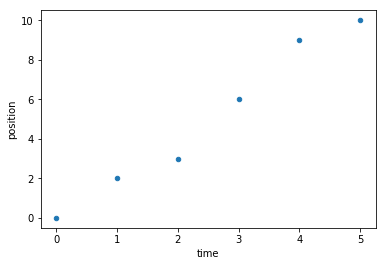

In [7]:
# This is the basic plotting command.
# Advanced plotting options can be found by searching for "pandas plot options" online.
data.plot.scatter(x='time',y='position'); # Plotting our data with time on the x axis and position on the y axis

This looks like we expected! Sometimes we'll want to do something like calculate the mean or standard deviation of our data.

In [8]:
data.mean() # Calculate the mean time and mean position

time        2.5
position    5.0
dtype: float64

In [9]:
data.std() # Calculate the standard deviation of time and position

time        1.870829
position    4.000000
dtype: float64

At this point you should know enough to be able to go and add a third column (velocity), enter values, and plot the data. 

In [10]:
# The next piece of code creates a simple data entry table.
startinglength = 5; # This is the initial length of the table, you can make it longer later.
data_table = pd.DataFrame({
    'time' :pd.Series(0,index=list(range(startinglength)),dtype='float32') ,
    'position' : pd.Series(0,index=list(range(startinglength)),dtype='float32'),
    'velocity' : pd.Series(0,index=list(range(startinglength)),dtype='float32')
})
qgrid_widget = qgrid.show_grid(data_table, show_toolbar=True)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [11]:
data2 = qgrid_widget.get_changed_df() # This creates a new variable called data with your updates
data2 # Putting a variable on its own line displays that variable

,time,position,velocity
0,0.0,0.0,1.0
1,1.0,2.0,0.9
2,2.0,3.9,1.1
3,3.0,6.1,1.0
4,4.0,8.0,1.0
5,5.0,9.9,0.9


In [12]:
# We entered data and stored it as a variable, we should save that to the computer!
#
# BE SURE TO CHANGE "x" TO "data2" to save your data!
#
# Save code:
import dill # It never hurts to reimport a package
filename = 'Data_Entry_Tutorial_Data.pkl' # This is where the data file will be stored
file = open(filename, 'wb') # This opens the file we are going to write the data to
dill.dump(data2, file) # This write the variable "data" to the "file" we specified
file.close() # This closes the file

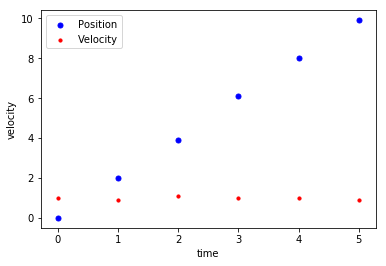

In [13]:
# Make the first plot
firstplot = data2.plot.scatter(x='time', y='position', color='Blue', s=25, label='Position');
# Add it to the second plot
data2.plot.scatter(x='time', y='velocity', color='Red', s=10, label='Velocity', ax=firstplot);

In [14]:
data2.mean()

time        2.500000
position    4.983333
velocity    0.983333
dtype: float64

In [15]:
data2.std()

time        1.870829
position    3.726348
velocity    0.075277
dtype: float64

One thing we might want to do is calculate a data column from two other data columns.

In [16]:
# We'll calculate the kinetic energy assuming a mass of 4 kg
m = 4 # mass in kg
data2['ke'] = 0.5*m*data2['velocity']**2 # The ** is "raised to the power of" in Python, similar to ^ or ee
data2['ke']

0    2.00
1    1.62
2    2.42
3    2.00
4    2.00
5    1.62
Name: ke, dtype: float64

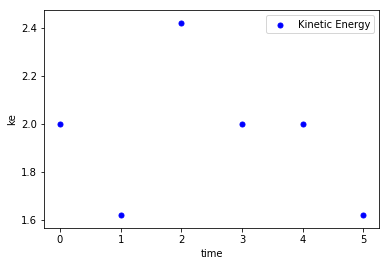

In [17]:
data2.plot.scatter(x='time', y='ke', color='Blue', s=25, label='Kinetic Energy');

In [18]:
# We entered data and stored it as a variable, we should save that to the computer!
#
# BE SURE TO CHANGE "x" TO "data2" to save your data!
#
# Save code:
import dill # It never hurts to reimport a package
filename = 'Data_Entry_Tutorial_Data.pkl' # This is where the data file will be stored
file = open(filename, 'wb') # This opens the file we are going to write the data to
dill.dump(data2, file) # This write the variable "data" to the "file" we specified
file.close() # This closes the file

Another thing we might want to do is to compare our data with a curve fit.

In [19]:
# First we need to define the function we are going to try and fit to the data
# Here we will try a straight line, y(x) = m*x + b
def func(x, m, b):
    return m * x + b
# Now we'll perform the fit
popt, pcov = curve_fit(func, data2['time'], data2['position'])

In [20]:
# To see what we did, we can look at the ouput fit parameters
popt

array([1.99142857, 0.0047619 ])

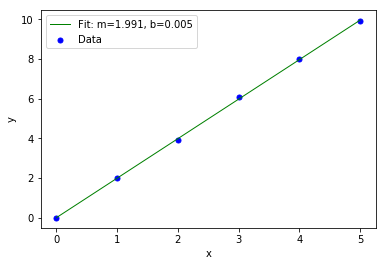

In [21]:
# Now lets plot the curve fit over the original data
plt.scatter(data2['time'], data2['position'], label='Data',s=25,c='b',);
plt.plot(data2['time'], func(data2['time'], *popt),label='Fit: m=%5.3f, b=%5.3f' % tuple(popt),c='g',linewidth=1.0);
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

This should be enough to get you started!